# Comparison of interpolation methods
We compare the results of our interpolation method versus reproject to verify the results.

In [1]:
from astropy.io import fits
from astropy.wcs import WCS
import time
from dfreproject import calculate_reprojection
from reproject import reproject_interp
from demo.create_test_data import create_test_fits_tiny
from matplotlib import pyplot as plt
import cmcrameri.cm as cmc
import numpy as np

## Create data
We are going to create a sample dataset of three Gaussian sources with a subpixel (0.2 pixel) shift with the relevant WCS information.

In [2]:
source_file, target_file = create_test_fits_tiny()
source_hdu = fits.open(source_file)[0]
target_hdu = fits.open(target_file)[0]
print(target_hdu.data.shape)

(50, 50)


## Run Reprojection
We are now going to run reprojection using our `dfreproject` package and the standard `reproject` package for comparison. Let's compare the results using the three types of interpolation we have: 'nearest-neighbor', 'bilinear', and 'bicubic'. Since the images are very small, the timing advantage isn't seen in our implementation.

### Nearest Neighbor

In [3]:
start = time.time()
reprojected_source_torch = calculate_reprojection(source_hdu, WCS(target_hdu.header), shape_out=target_hdu.data.shape, order="nearest")
print(f"total time: {time.time()-start}")

total time: 0.6801936626434326


In [4]:
start = time.time()
reprojected_source_reproj = reproject_interp(source_hdu, target_hdu.header,order='nearest-neighbor')[0]
#reprojected_source_reproj = reproject_interp(target_hdu, source_hdu.header,order='bicubic')[0]
print(f"total time: {time.time()-start}")

total time: 0.044681549072265625


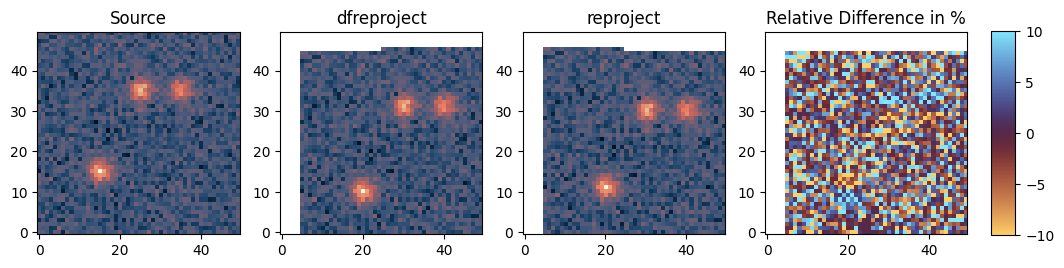

In [5]:
fig, axs = plt.subplots(1, 4, figsize=(12,6))
axs[0].imshow(source_hdu.data, origin='lower', cmap=cmc.lipari)
axs[0].set_title('Source')

im1 = axs[1].imshow(reprojected_source_torch, origin='lower', cmap=cmc.lipari)
axs[1].set_title("dfreproject")

im2 = axs[2].imshow(reprojected_source_reproj, origin='lower', cmap=cmc.lipari)
axs[2].set_title("reproject")

diff_result = 100*(reprojected_source_torch.astype(np.float32)- reprojected_source_reproj.astype(np.float32))/reprojected_source_reproj.astype(np.float32)
im3 = axs[3].imshow(diff_result, origin='lower', cmap=cmc.managua, vmin=-10, vmax=10)
axs[3].set_title("Relative Difference in %")

cbar_ax = fig.add_axes([0.92, 0.325, 0.02, 0.34])  # [left, bottom, width, height]
fig.colorbar(im3, cax=cbar_ax)
plt.show()

As we can see the results are extremely similar. The differences are due to how the normalization is handled in our implementation versus reproject_interp.

### Bilinear

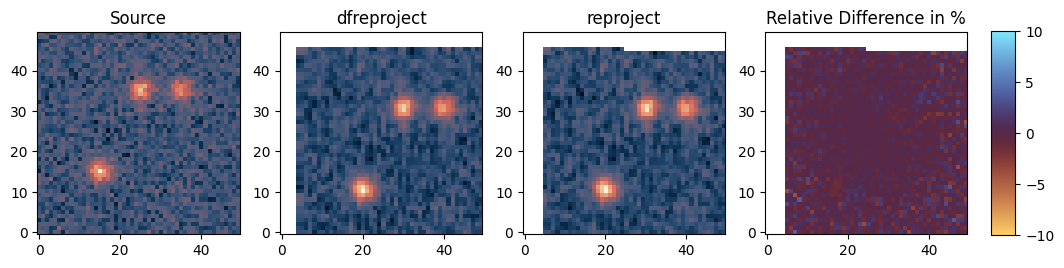

In [6]:
reprojected_source_torch = calculate_reprojection(source_hdu, WCS(target_hdu.header), shape_out=target_hdu.data.shape,
                                                  order="bilinear")
reprojected_source_reproj = reproject_interp(source_hdu, target_hdu.header,order='bilinear')[0]
fig, axs = plt.subplots(1, 4, figsize=(12,6))
axs[0].imshow(source_hdu.data, origin='lower', cmap=cmc.lipari)
axs[0].set_title('Source')

im1 = axs[1].imshow(reprojected_source_torch, origin='lower', cmap=cmc.lipari)
axs[1].set_title("dfreproject")

im2 = axs[2].imshow(reprojected_source_reproj, origin='lower', cmap=cmc.lipari)
axs[2].set_title("reproject")

diff_result = 100*(reprojected_source_torch.astype(np.float32)- reprojected_source_reproj.astype(np.float32))/reprojected_source_reproj.astype(np.float32)
im3 = axs[3].imshow(diff_result, origin='lower', cmap=cmc.managua, vmin=-10, vmax=10)
axs[3].set_title("Relative Difference in %")

cbar_ax = fig.add_axes([0.92, 0.325, 0.02, 0.34])  # [left, bottom, width, height]
fig.colorbar(im3, cax=cbar_ax)
plt.show()

### Bicubic

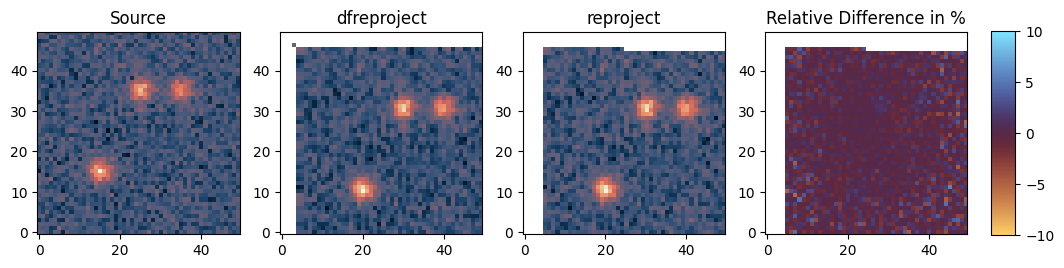

In [7]:
reprojected_source_torch = calculate_reprojection(source_hdu, WCS(target_hdu.header), shape_out=target_hdu.data.shape,
                                                  order="bicubic")
reprojected_source_reproj = reproject_interp(source_hdu, target_hdu.header,order='bicubic')[0]
fig, axs = plt.subplots(1, 4, figsize=(12,6))
axs[0].imshow(source_hdu.data, origin='lower', cmap=cmc.lipari)
axs[0].set_title('Source')

im1 = axs[1].imshow(reprojected_source_torch, origin='lower', cmap=cmc.lipari)
axs[1].set_title("dfreproject")

im2 = axs[2].imshow(reprojected_source_reproj, origin='lower', cmap=cmc.lipari)
axs[2].set_title("reproject")

diff_result = 100*(reprojected_source_torch.astype(np.float32)- reprojected_source_reproj.astype(np.float32))/reprojected_source_reproj.astype(np.float32)
im3 = axs[3].imshow(diff_result, origin='lower', cmap=cmc.managua, vmin=-10, vmax=10)
axs[3].set_title("Relative Difference in %")

cbar_ax = fig.add_axes([0.92, 0.325, 0.02, 0.34])  # [left, bottom, width, height]
fig.colorbar(im3, cax=cbar_ax)
plt.show()